# Random Forest

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.txt', sep='\s+')
df.atom_list = df.atom_list.apply(lambda x: list(map(int, x.split(','))))
df = df.reset_index().drop(columns=['index'])
atom_dict = {
    12: 'Mg',
    13: 'Al',
    20: 'Ca',
    22: 'Ti',
    23: 'V',
    24: 'Cr',
    25: 'Mn',
    26: 'Fe',
    27: 'Co',
    28: 'Ni',
    29: 'Cu',
    30: 'Zn',
    38: 'Sr',
    56: 'Ba',
}
for an, name in atom_dict.items():
    df[name] = df.atom_list.apply(lambda x: x.count(an) / len(x))
X = df[atom_dict.values()]
y = df.Stabilized

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
def get_correctness(clf, X, y, n=100, ts=0.2):
    y_pred = np.array([])
    y_true = np.array([])
    for i in range(n):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts)
        if len(y_train.unique()) == 1:
            continue
        clf.fit(X_train, y_train)
        y_pred = np.r_[y_pred, clf.predict(X_test)] 
        y_true = np.r_[y_true, y_test] 
    return accuracy_score(y_true, y_pred), roc_auc_score(y_true, y_pred)

In [5]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_depth=10, n_jobs=6)
clf.fit(X[:100], y[:100])
# print(clf.predict_proba(X[100:]))
print(accuracy_score(y[100:], clf.predict(X[100:])), roc_auc_score(y[100:], clf.predict(X[100:])))

0.8975609756097561 0.7854317165462676


In [4]:
ts = []
acc = []
roc_auc = []
for i in range(9):
    print('process %i/%i' % (i, 9))
    ts.append(i / 10 + 0.1)
    a, b = get_correctness(clf, X, y, ts=1-ts[-1])
    acc.append(a)
    roc_auc.append(b)

process 0/9
process 1/9
process 2/9
process 3/9
process 4/9
process 5/9
process 6/9
process 7/9
process 8/9


# GPC

In [5]:
import sys
sys.path.append('../..')
from ChemML.HighEntropySpinel.HighEntropySpinel import *
from ChemML.chemml.classification.gpc.gpc import GPC
df = pd.read_csv('sample1.txt', sep='\s+')
df1 = pd.read_csv('sample2.txt', sep='\s+')
df = pd.concat([df, df1])
df = df.reset_index().drop(columns=['index'])
c = df['atom_list'].apply(lambda x: list(map(int, x.split(','))))
hash = list(map(lambda x: ','.join(list(map(str, np.sort(x)))), c))
graphs = list(map(HashGraph.from_atom_list, c, hash))
df['graph'] = graphs
df['atom_list'] = c.apply(lambda x: tuple(np.sort(x)))
X = df['graph']
y = df['target']
group_id = df.index
kernel_config = set_kernel_config(
    'graph', None, None,
    ['graph'], [], '../../ChemML/HighEntropySpinel/tensorproduct-NMGK.json', 'test'
)
K = kernel_config.kernel.__call__(X)
kernel_dict = {
    'group_id': group_id,
    'K': K,
    'theta': kernel_config.kernel.theta
}
kernel_pkl = os.path.join('../../ChemML/HighEntropySpinel', 'kernel.pkl')
pickle.dump(kernel_dict, open(kernel_pkl, 'wb'), protocol=4)
kernel_config = set_kernel_config(
    'preCalc', None, None,
    ['graph'], [], '../../ChemML/HighEntropySpinel/tensorproduct-NMGK.json', '../../ChemML/HighEntropySpinel'
)
clf = GPC(kernel=kernel_config.kernel, optimizer=None)
X = group_id
clf.fit(X[:100], y[:100])
print(accuracy_score(y[100:], clf.predict(X[100:])), roc_auc_score(y[100:], clf.predict(X[100:])))

/home/xiangyan/anaconda3/envs/graphdot/lib/python3.7/site-packages/tqdm/std.py:706: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
/home/xiangyan/anaconda3/envs/graphdot/lib/python3.7/site-packages/tqdm/std.py:706: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


0.8867924528301887 0.625


In [6]:
ts_ = []
acc_ = []
roc_auc_ = []
for i in range(9):
    print('process %i/%i' % (i, 9))
    ts_.append(i / 10 + 0.1)
    a, b = get_correctness(clf, X, y, ts=1-ts_[-1])
    acc_.append(a)
    roc_auc_.append(b)

process 0/9
process 1/9
process 2/9
process 3/9
process 4/9
process 5/9
process 6/9
process 7/9
process 8/9


In [7]:
'''
ts_1 = []
co_1 = []
for i in range(9):
    print('process %i/%i' % (i, 9))
    ts_1.append(i / 10 + 0.1)
    co_1.append(get_correctness(clf, group_id, y, ts=1-ts_1[-1]))
'''

"\nts_1 = []\nco_1 = []\nfor i in range(9):\n    print('process %i/%i' % (i, 9))\n    ts_1.append(i / 10 + 0.1)\n    co_1.append(get_correctness(clf, group_id, y, ts=1-ts_1[-1]))\n"

In [8]:
import sys
sys.path.append('../..')
from ChemML.HighEntropySpinel.HighEntropySpinel import *
from ChemML.chemml.classification.gpc.gpc import GPC
df = pd.read_csv('sample1.txt', sep='\s+')
df1 = pd.read_csv('sample2.txt', sep='\s+')
df = pd.concat([df, df1])
df = df.reset_index().drop(columns=['index'])
c = df['atom_list'].apply(lambda x: list(map(int, x.split(','))))
hash = list(map(lambda x: ','.join(list(map(str, np.sort(x)))), c))
graphs = list(map(HashGraph.from_atom_list, c, hash))
df['graph'] = graphs
df['atom_list'] = c.apply(lambda x: tuple(np.sort(x)))
X = df['graph']
y = df['target']
group_id = df.index
kernel_config = set_kernel_config(
    'graph', None, None,
    ['graph'], [], '../../ChemML/HighEntropySpinel/tensorproduct-NMGK1.json', 'test'
)
K = kernel_config.kernel.__call__(X)
kernel_dict = {
    'group_id': group_id,
    'K': K,
    'theta': kernel_config.kernel.theta
}
kernel_pkl = os.path.join('../../ChemML/HighEntropySpinel', 'kernel.pkl')
pickle.dump(kernel_dict, open(kernel_pkl, 'wb'), protocol=4)
kernel_config = set_kernel_config(
    'preCalc', None, None,
    ['graph'], [], '../../ChemML/HighEntropySpinel/tensorproduct-NMGK1.json', '../../ChemML/HighEntropySpinel'
)
clf = GPC(kernel=kernel_config.kernel, optimizer=None)
X = group_id
clf.fit(X[:100], y[:100])
print(accuracy_score(y[100:], clf.predict(X[100:])), roc_auc_score(y[100:], clf.predict(X[100:])))

0.8867924528301887 0.625


In [9]:
ts__ = []
acc__ = []
roc_auc__ = []
for i in range(9):
    print('process %i/%i' % (i, 9))
    ts__.append(i / 10 + 0.1)
    a, b = get_correctness(clf, X, y, ts=1-ts__[-1])
    acc__.append(a)
    roc_auc__.append(b)

process 0/9
process 1/9
process 2/9
process 3/9
process 4/9
process 5/9
process 6/9
process 7/9
process 8/9


# Figure

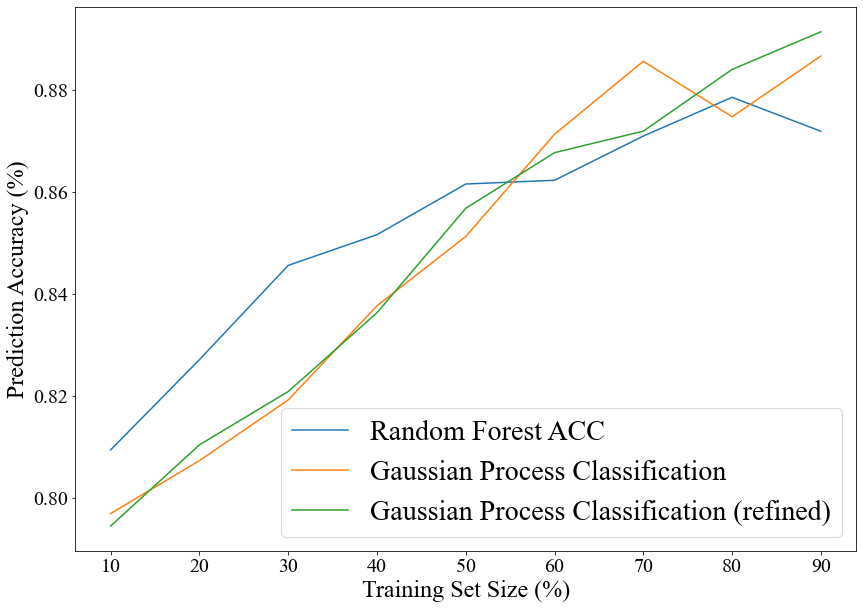

In [10]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': '28',
          'figure.figsize': (12, 8),  # 8*6
          'axes.labelsize': '24',
          'axes.titlesize': '40',
          'xtick.labelsize': '20',
          'ytick.labelsize': '20',
          'font.family': 'serif',
          'font.serif': 'Times New Roman',
          }
pylab.rcParams.update(params)
plt.figure(figsize=(14,10))
plt.plot(np.asarray(ts) * 100, acc, label='Random Forest ACC')
plt.plot(np.asarray(ts_) * 100, acc_, label='Gaussian Process Classification')
plt.plot(np.asarray(ts__) * 100, acc__, label='Gaussian Process Classification (refined)')
plt.xlabel('Training Set Size (%)')
plt.ylabel('Prediction Accuracy (%)')
plt.legend()
plt.savefig('size.png')

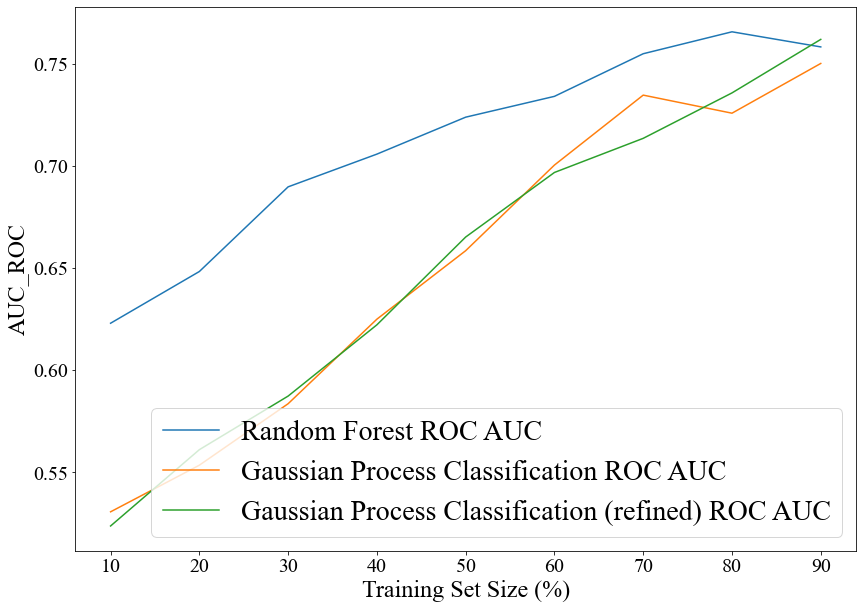

In [11]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': '28',
          'figure.figsize': (12, 8),  # 8*6
          'axes.labelsize': '24',
          'axes.titlesize': '40',
          'xtick.labelsize': '20',
          'ytick.labelsize': '20',
          'font.family': 'serif',
          'font.serif': 'Times New Roman',
          }
pylab.rcParams.update(params)
plt.figure(figsize=(14,10))
plt.plot(np.asarray(ts) * 100, roc_auc, label='Random Forest ROC AUC')
plt.plot(np.asarray(ts) * 100, roc_auc_, label='Gaussian Process Classification ROC AUC')
plt.plot(np.asarray(ts) * 100, roc_auc__, label='Gaussian Process Classification (refined) ROC AUC')
plt.xlabel('Training Set Size (%)')
plt.ylabel('AUC_ROC')
plt.legend()
plt.savefig('size.png')